In [1]:
import pandas as pd


file_path = '/Users/ashnaarora/Downloads/Dataset_with_new_features (1).csv'
df = pd.read_csv(file_path)

In [2]:
df.shape

(9611, 29)

In [3]:
df.columns

Index(['essay_id', 'text', 'source', 'generated', 'temp', 'word_count',
       'average_word_length', 'vocabulary_richness', 'flesch_kincaid',
       'gunning_fog', 'smog_index', 'polarity', 'subjectivity',
       'misspelled_word_count', 'sentence_length', 'punctuation_count',
       'punctuation_density', 'pos_counts', 'pos_density', 'noun_count',
       'verb_count', 'adjective_count', 'adverb_count', 'noun_density',
       'verb_density', 'adjective_density', 'adverb_density', 'perplexity',
       'ai_ratio'],
      dtype='object')

In [4]:
df['misspelling_rate'] = df['misspelled_word_count'] / df['word_count']
df = df.drop(columns=['misspelled_word_count'])


In [11]:
df.shape

(9611, 29)

In [18]:
import pandas as pd

print("Number of NaN values in each column:")
print(df.isna().sum())


df.fillna(0.0, inplace=True)

print("\nAfter replacing NaN values:")
print(df.isna().sum())




Number of NaN values in each column:
essay_id               0
text                   0
source                 0
generated              0
vocabulary_richness    0
gunning_fog            0
smog_index             0
polarity               0
subjectivity           0
noun_density           0
verb_density           0
adjective_density      0
adverb_density         0
perplexity             0
dtype: int64

After replacing NaN values:
essay_id               0
text                   0
source                 0
generated              0
vocabulary_richness    0
gunning_fog            0
smog_index             0
polarity               0
subjectivity           0
noun_density           0
verb_density           0
adjective_density      0
adverb_density         0
perplexity             0
dtype: int64


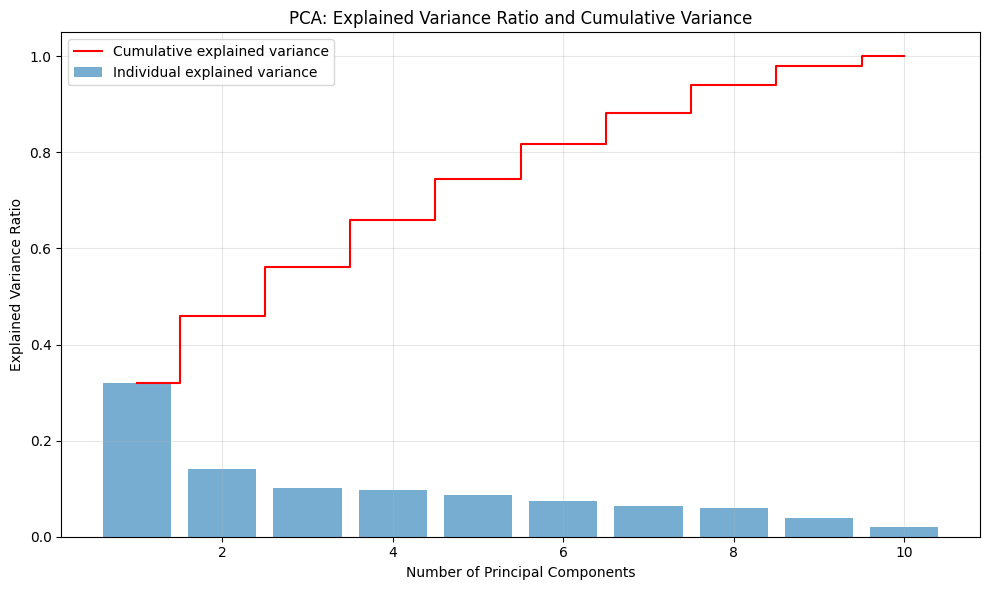

Number of components explaining at least 95% variance: 9


In [19]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

pca = PCA()
pca_data = pca.fit_transform(scaled_data)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance', color='red')

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA: Explained Variance Ratio and Cumulative Variance')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining at least 95% variance: {n_components_95}")


In [17]:
import string

columns_to_drop = [
    'word_count', 'average_word_length', 'sentence_length',
    'noun_count', 'verb_count', 'adjective_count', 'adverb_count', 'flesch_kincaid',
    'punctuation_count', 'punctuation_density', 'ai_ratio', 'temp', 'misspelling_rate', 'pos_counts', 'pos_density'
    
]

df = df.drop(columns=columns_to_drop, axis=1)

print("Remaining columns in the DataFrame:")
print(df.columns)


# Calculate punctuation rate
# df['punctuation_rate'] = df['text'].apply(lambda x: sum(1 for char in x if char in string.punctuation) / len(x.split()) if len(x.split()) > 0 else 0)




Remaining columns in the DataFrame:
Index(['essay_id', 'text', 'source', 'generated', 'vocabulary_richness',
       'gunning_fog', 'smog_index', 'polarity', 'subjectivity', 'noun_density',
       'verb_density', 'adjective_density', 'adverb_density', 'perplexity'],
      dtype='object')


In [20]:
from sklearn.decomposition import PCA
pca_12 = PCA(n_components=9)

reduced_data = pca_12.fit_transform(scaled_data)

reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(9)])

print(reduced_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.299589 -1.544884  0.616784 -0.745889  0.201032 -0.970374 -0.312874   
1 -2.290503  0.324305  0.006133 -0.213602  0.253705 -0.595827 -0.477839   
2 -1.348318 -0.270886 -0.692341 -1.163940 -0.602528  0.659894  0.524783   
3 -0.490330  1.193091 -0.164686 -0.475832 -0.163446  0.188114  0.313546   
4 -3.842052  0.908197  0.026487 -0.346311  1.696407  0.077545  0.515282   

        PC8       PC9  
0  0.968355 -0.402577  
1  0.032178 -0.511274  
2  0.259799 -1.019945  
3 -0.926487 -0.941445  
4 -0.791881  0.859469  


In [21]:
loadings = pd.DataFrame(
    pca_12.components_, 
    columns=df_numeric.columns,  
    index=[f'PC{i+1}' for i in range(9)] 
)

print("PCA Loadings:")
print(loadings)

top_features_per_pc = {}
for pc in loadings.index:
    top_features = loadings.loc[pc].abs().sort_values(ascending=False).head(3)  # Top 3 features
    top_features_per_pc[pc] = top_features.index.tolist()

print("\nTop Contributing Features for Each Principal Component:")
for pc, features in top_features_per_pc.items():
    print(f"{pc}: {features}")


PCA Loadings:
     vocabulary_richness  gunning_fog  smog_index  polarity  subjectivity  \
PC1             0.324009     0.242202    0.438181 -0.069667     -0.117201   
PC2            -0.205342     0.015242    0.189610  0.574583      0.562543   
PC3             0.266313     0.313938   -0.071141  0.380172      0.371737   
PC4            -0.060823     0.576134    0.267743 -0.320676      0.115017   
PC5            -0.465678     0.616081    0.007692  0.071532     -0.230641   
PC6            -0.263391    -0.077149    0.036032  0.342543     -0.481495   
PC7             0.524699     0.180659   -0.056039  0.483573     -0.442158   
PC8             0.431847     0.056471   -0.025938 -0.239916      0.164098   
PC9            -0.061003    -0.296976    0.802682  0.058201     -0.051858   

     noun_density  verb_density  adjective_density  adverb_density  perplexity  
PC1      0.471094     -0.437257           0.335069       -0.316754   -0.006091  
PC2     -0.098446     -0.061543           0.171396   

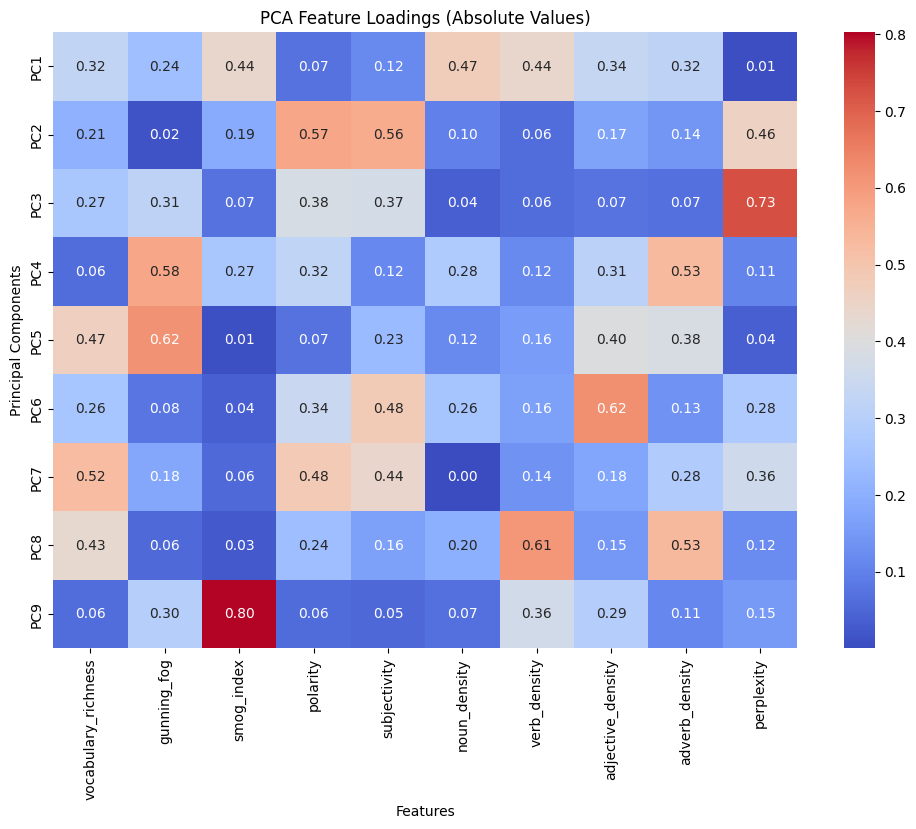

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(loadings.abs(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("PCA Feature Loadings (Absolute Values)")
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.show()


In [24]:
#after pcs

columns_to_drop = [
    'vocabulary_richness', 'polarity', 'subjectivity',
    'noun_density', 'verb_density', 'adjective_density', 'adverb_density', 

]

# Drop the selected columns
df = df.drop(columns=columns_to_drop, axis=1)

# Print the remaining columns to verify
print("Remaining columns in the DataFrame:")
print(df.columns)

Remaining columns in the DataFrame:
Index(['essay_id', 'text', 'source', 'generated', 'gunning_fog', 'smog_index',
       'perplexity'],
      dtype='object')


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score


In [26]:
df.columns

Index(['essay_id', 'text', 'source', 'generated', 'gunning_fog', 'smog_index',
       'perplexity'],
      dtype='object')

In [27]:
df = df[df['generated'] != 'generated']


In [28]:
print(df['generated'].unique())



['0' '1']


In [29]:
count_generated_1 = df[df['generated'] == '1'].shape[0]

count_generated_0 = df[df['generated'] == '0'].shape[0]

print(f"Count of generated == 1: {count_generated_1}")
print(f"Count of generated == 0: {count_generated_0}")


Count of generated == 1: 3984
Count of generated == 0: 5626


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9610 entries, 0 to 9610
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   essay_id     9610 non-null   object 
 1   text         9610 non-null   object 
 2   source       9610 non-null   object 
 3   generated    9610 non-null   object 
 4   gunning_fog  9610 non-null   float64
 5   smog_index   9610 non-null   float64
 6   perplexity   9610 non-null   float64
dtypes: float64(3), object(4)
memory usage: 600.6+ KB


In [16]:
y = df['generated'].astype(int)
X = df.drop(columns=['generated', 'essay_id', 'text', 'source']).fillna(0.0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


from sklearn.preprocessing import StandardScaler

readability_metrics = ['gunning_fog', 'smog_index', 'perplexity']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[readability_metrics])
X_val_scaled = scaler.transform(X_val[readability_metrics])
X_test_scaled = scaler.transform(X_test[readability_metrics])

X_train = pd.DataFrame(X_train_scaled, columns=readability_metrics, index=X_train.index)
X_val = pd.DataFrame(X_val_scaled, columns=readability_metrics, index=X_val.index)
X_test = pd.DataFrame(X_test_scaled, columns=readability_metrics, index=X_test.index)




In [17]:
print(X_train.dtypes)


gunning_fog    float64
smog_index     float64
perplexity     float64
dtype: object


In [18]:
print(y_train.unique())
print(y_val.unique())


[0 1]
[0 1]


In [19]:
X_train = X_train.fillna(0.0)
X_val = X_val.fillna(0.0)


In [20]:
print(X_train.isna().sum().sum())  # Should output 0
print(X_val.isna().sum().sum())    # Should output 0
print(y_train.isna().sum())        # Should output 0
print(y_val.isna().sum())          # Should output 0


0
0
0
0


[0]	validation-logloss:0.69254
[1]	validation-logloss:0.69194
[2]	validation-logloss:0.69159
[3]	validation-logloss:0.69110
[4]	validation-logloss:0.69050
[5]	validation-logloss:0.69029
[6]	validation-logloss:0.68970
[7]	validation-logloss:0.68953
[8]	validation-logloss:0.68904
[9]	validation-logloss:0.68870
[10]	validation-logloss:0.68851
[11]	validation-logloss:0.68817
[12]	validation-logloss:0.68783
[13]	validation-logloss:0.68723
[14]	validation-logloss:0.68663
[15]	validation-logloss:0.68651
[16]	validation-logloss:0.68602
[17]	validation-logloss:0.68597
[18]	validation-logloss:0.68591
[19]	validation-logloss:0.68586
[20]	validation-logloss:0.68526
[21]	validation-logloss:0.68522
[22]	validation-logloss:0.68516
[23]	validation-logloss:0.68513
[24]	validation-logloss:0.68510
[25]	validation-logloss:0.68452
[26]	validation-logloss:0.68448
[27]	validation-logloss:0.68445
[28]	validation-logloss:0.68396
[29]	validation-logloss:0.68393
[30]	validation-logloss:0.68334
[31]	validation-lo

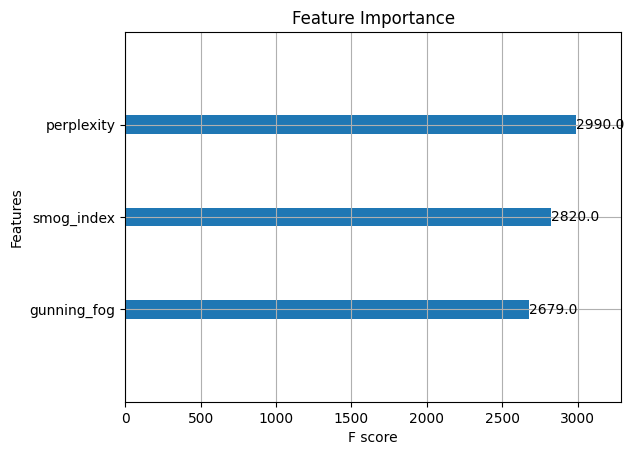

In [63]:

import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt


dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)


import xgboost as xgb

params = {
    'objective': 'binary:logistic',  
    'learning_rate': 0.0001,         
    'max_depth': 3,                  
    'min_child_weight': 20,          
    'subsample': 0.75,                
    'colsample_bytree': 0.75,         
    'eval_metric': 'logloss',        
    'lambda': 30,                    
    'alpha': 25,                     
    'booster': 'dart',               
    'rate_drop': 0.5,                
    'scale_pos_weight': len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    'skip_drop': 0.5    
}          

bst = xgb.train(
    params,                          
    dtrain,                          
    num_boost_round=1500,            
    evals=[(dval, 'validation')],    
    early_stopping_rounds=10,        
    verbose_eval=True                
)


y_val_pred = bst.predict(dval)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

accuracy = accuracy_score(y_val, y_val_pred_binary)
roc_auc = roc_auc_score(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred_binary)

print(f"Validation Accuracy: {accuracy}")
print(f"Validation ROC-AUC: {roc_auc}")
print("Classification Report:\n", report)

xgb.plot_importance(bst)
plt.title("Feature Importance")
plt.show()


In [64]:
y_test = y_test.astype(int)


In [65]:
dtest = xgb.DMatrix(X_test, label=y_test)
y_test_pred = bst.predict(dtest)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)



In [66]:
print(y_test.dtype) 
print(y_test_pred_binary.dtype)  


int64
int64


In [67]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

accuracy = accuracy_score(y_test, y_test_pred_binary)

roc_auc = roc_auc_score(y_test, y_test_pred)

report = classification_report(y_test, y_test_pred_binary)

print(f"Test Accuracy: {accuracy}")
print(f"Test ROC-AUC: {roc_auc}")
print("Classification Report:")
print(report)


Test Accuracy: 0.8959417273673257
Test ROC-AUC: 0.9548887859128823
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1092
           1       0.86      0.90      0.88       830

    accuracy                           0.90      1922
   macro avg       0.89      0.90      0.89      1922
weighted avg       0.90      0.90      0.90      1922



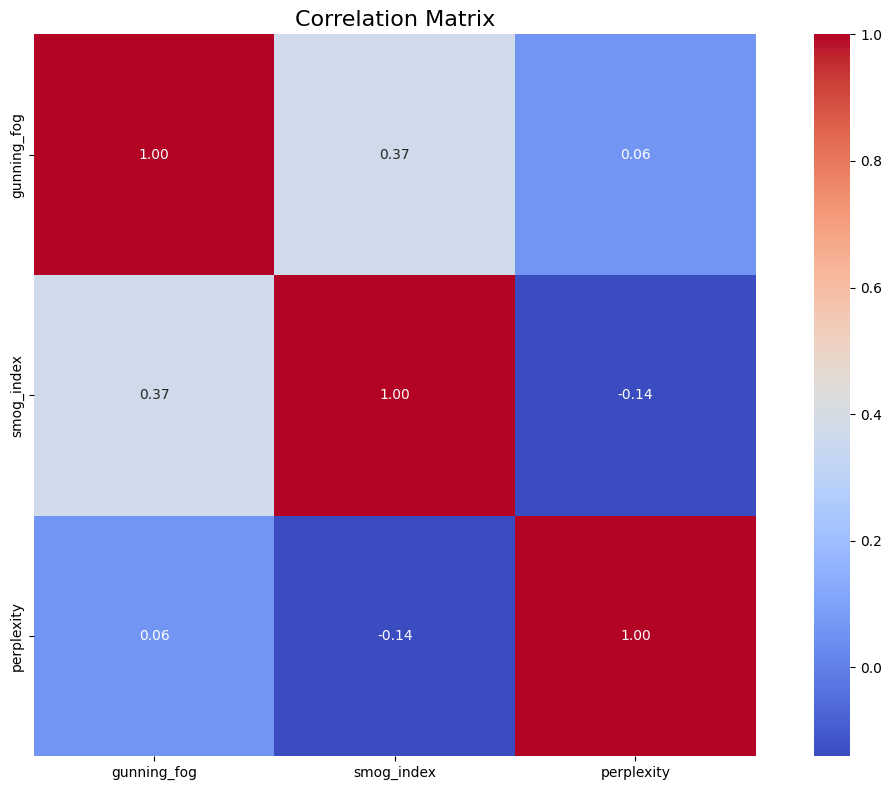

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = X.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",     
    cbar=True,           
    square=True          
)

plt.title("Correlation Matrix", fontsize=16)

plt.tight_layout()
plt.show()


In [69]:

new_test_file_path = '/Users/ashnaarora/Downloads/huggingface_with_perplexity.csv'
new_test_df = pd.read_csv(new_test_file_path)

print(new_test_df.head())
print(new_test_df.columns)


                                                text  generated  word_count  \
0  With this project, participants can also learn...          1          81   
1  Longer school days would give them less time t...          1         256   
2  This could include having to independently pay...          1         290   
3  Some poeple think the first impressions they c...          0         256   
4  Also i think that the principal should decide ...          0         118   

   vocabulary_richness  gunning_fog  smog_index  polarity  subjectivity  \
0             0.728395        12.07        11.2  0.156944      0.315873   
1             0.531250        11.65        11.7  0.073198      0.390412   
2             0.593103        12.69        13.7  0.103705      0.519151   
3             0.285156         6.34        11.0 -0.027778      0.543210   
4             0.550847         8.12        10.6  0.155952      0.726190   

   noun_count  verb_count  adverb_count  noun_density  verb_density  \
0  

In [70]:
new_test_df.columns

Index(['text', 'generated', 'word_count', 'vocabulary_richness', 'gunning_fog',
       'smog_index', 'polarity', 'subjectivity', 'noun_count', 'verb_count',
       'adverb_count', 'noun_density', 'verb_density', 'adjective_density',
       'adverb_density', 'perplexity'],
      dtype='object')

In [71]:
readability_metrics = ['gunning_fog', 'smog_index', 'perplexity']
new_test_df[readability_metrics] = scaler.transform(new_test_df[readability_metrics])

columns_to_drop1 = [
    'word_count', 
    'noun_count', 'verb_count', 'adverb_count', 'text', 'vocabulary_richness', 
        'polarity', 'subjectivity', 'noun_count', 'verb_count',
       'adverb_count', 'noun_density', 'verb_density', 'adjective_density',
       'adverb_density'
]
new_test_df = new_test_df.drop(columns=columns_to_drop1, axis=1)


In [72]:
y_new_test = new_test_df['generated'].astype(int)
X_new_test = new_test_df.drop(columns=['generated'])


In [73]:
dnew_test = xgb.DMatrix(X_new_test)


In [74]:
new_test_pred = bst.predict(dnew_test)
new_test_pred_binary = (new_test_pred > 0.5).astype(int)

accuracy = accuracy_score(y_new_test, new_test_pred_binary)
roc_auc = roc_auc_score(y_new_test, new_test_pred)
classification_report_output = classification_report(y_new_test, new_test_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print("Classification Report:")
print(classification_report_output)


Accuracy: 0.82
ROC-AUC: 0.9064057333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      7500
           1       0.84      0.79      0.82      7500

    accuracy                           0.82     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.82      0.82      0.82     15000



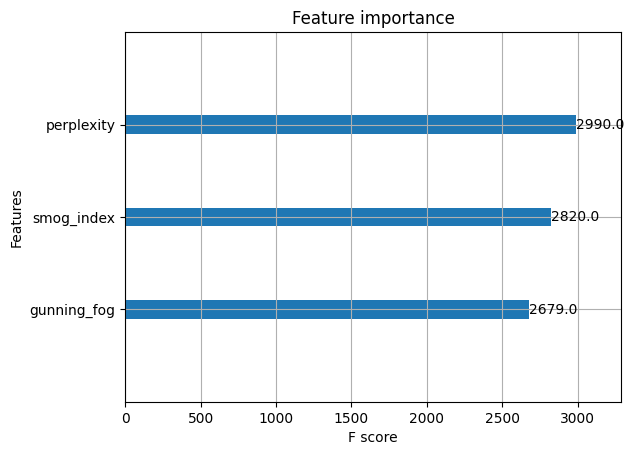

In [75]:
from xgboost import plot_importance
plot_importance(bst)
plt.show()


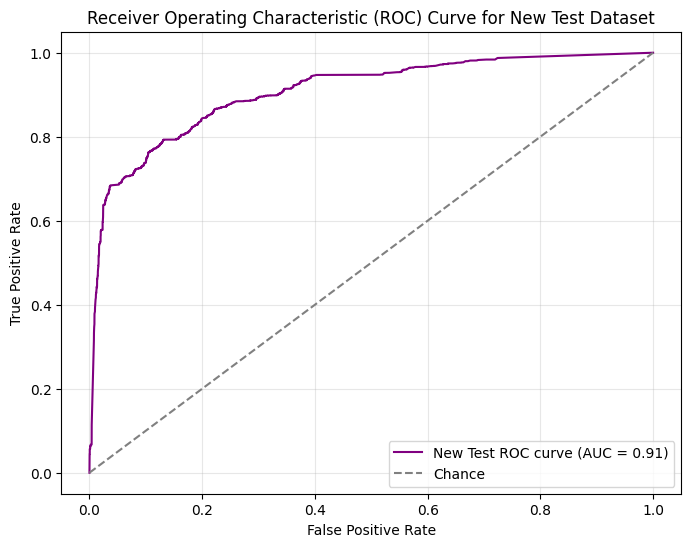

In [76]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_new_test, tpr_new_test, _ = roc_curve(y_new_test, new_test_pred)
roc_auc_new_test = auc(fpr_new_test, tpr_new_test)

plt.figure(figsize=(8, 6))

plt.plot(fpr_new_test, tpr_new_test, color='purple', label=f'New Test ROC curve (AUC = {roc_auc_new_test:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for New Test Dataset')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
